In [50]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [51]:
class Experiment:
    def __init__(self, path):
        self.path = path
        self.main = pd.DataFrame()
        self.categories = []

    def read_data(self):
        """
        Reads the data from the csv file.
        """
        for root, dirs, files in os.walk(self.path):
            for dir in dirs:
                for root, dirs, files in os.walk(os.path.join(self.path, dir)):
                    for file in files:
                        if file.endswith('_data.csv'):
                            # save the file name without '_data'
                            file_name = file[:-7]
                            # print('Reading file:', file_name)

                            data = pd.read_csv(os.path.join(self.path, dir, file))
                            data.drop(['Unnamed: 0'], axis=1, inplace=True)
                            # add a column to indicate the file name
                            data['file_name'] = file_name

                            self.main = self.main.append(data)


    def new_plot(self):
        """
        Plots the data.
        """
        # make a copy
        data = self.main.copy()

        # remove max_len column
        data.drop(['max_len'], axis=1, inplace=True)
        data.drop(['corpus_size'], axis=1, inplace=True)

        # NORMALISATION
        # if file_name starts with 2b the value for precision, recall, f1 is divided by 100
        for index, line in data.iterrows():
            if line['file_name'].startswith('2b'):
                data.loc[index, 'precision'] = line['precision'] / 100
                data.loc[index, 'recall'] = line['recall'] / 100
                data.loc[index, 'f1-score'] = line['f1-score'] / 100
        
        # save file_name as the index
        data.set_index('file_name', inplace=True)

        # set a bigger size
        plt.rcParams['figure.figsize'] = (18, 8)
        ax = data.plot.bar(rot=45)
        plt.tight_layout()

### Read the data file and plot the experiments

In [52]:
path = "model"

demo = Experiment(path)
demo.read_data()

### Plot the experiments 
(including accuracy, precision, recall, f1-score)

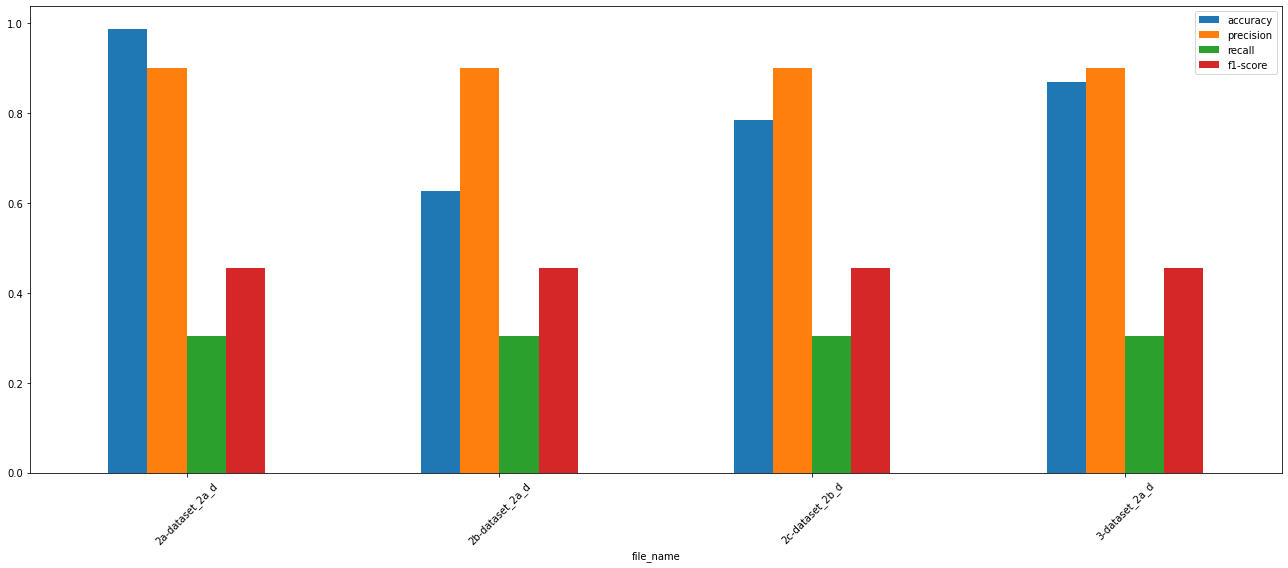

In [53]:
demo.new_plot()